In [26]:
#import librarys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
import cv2
import tensorflow as tf 
import keras 
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from keras import regularizers
#load dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
print('shape of x_train =>',x_train.shape)
print('shape of y_train =>',y_train.shape)

print('shape of x_test =>',x_test.shape)
print('shape of y_test =>',y_test.shape)

shape of x_train => (50000, 32, 32, 3)
shape of y_train => (50000, 10)
shape of x_test => (10000, 32, 32, 3)
shape of y_test => (10000, 10)


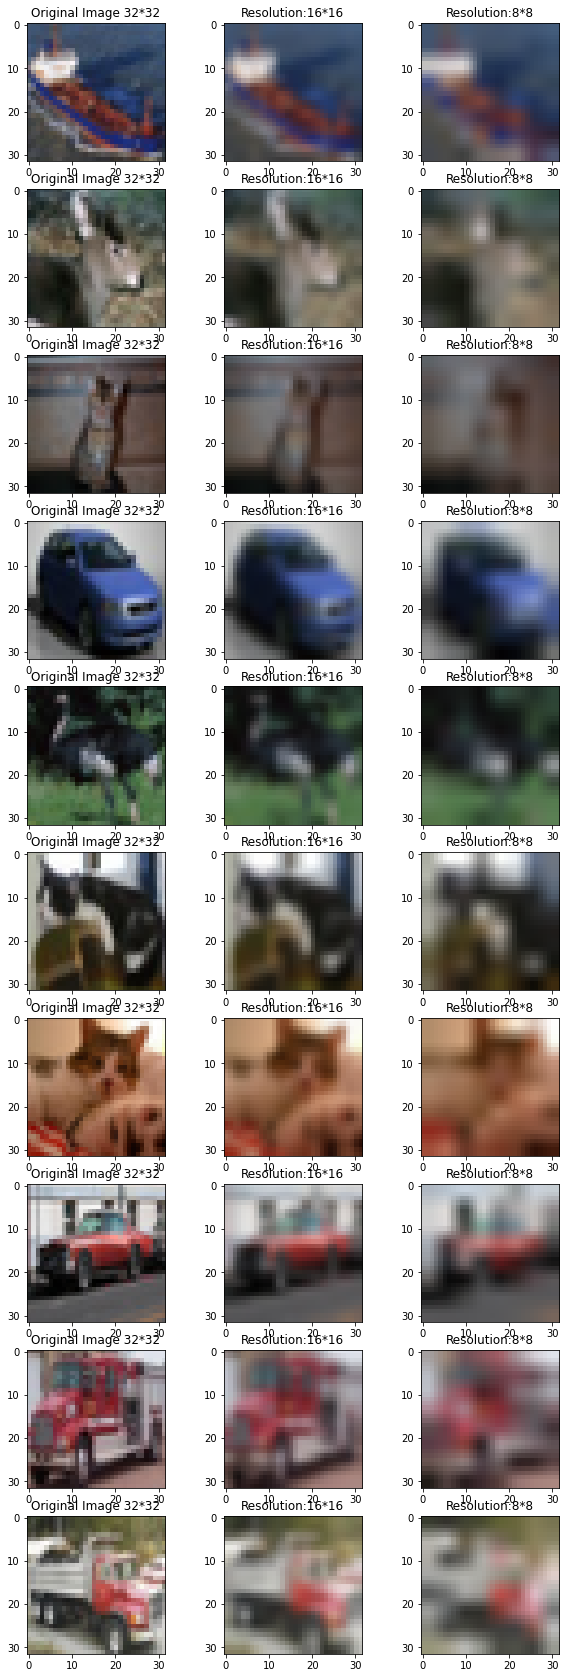

In [3]:
#make different resolution of dataset
x_train16 = []
x_train8 = []
for i in range(0,len(x_train)):
    image16 = cv2.resize(cv2.resize(x_train[i],(16,16)),(32,32))
    image8 = cv2.resize(cv2.resize(x_train[i],(8,8)),(32,32))
    x_train16.append(image16)
    x_train8.append(image8)
x_train16 = np.array(x_train16)
x_train8 = np.array(x_train8)

x_test16 = []
x_test8 = []
for i in range(0,len(x_test)):
    image16 = cv2.resize(x_test[i],(16,16))
    image8 = cv2.resize(x_test[i],(8,8))
    x_test16.append(image16)
    x_test8.append(image8)
x_test16 = np.array(x_test16)
x_test8 = np.array(x_test8)
#plot 10 random image in different resolution
fig, axs = plt.subplots(10, 3,figsize = (10,30))
for i in range(10):
    random = np.random.randint(len(x_train),size=1)
    axs[i,0].imshow(x_train[int(random)])
    axs[i,0].set_title("Original Image 32*32")
    axs[i,1].imshow(x_train16[int(random)])
    axs[i,1].set_title("Resolution:16*16")
    axs[i,2].imshow(x_train8[int(random)])
    axs[i,2].set_title("Resolution:8*8")

In [33]:
#normalization of data
x_train.astype("float32")
x_test=x_test.astype("float32")
# normalize to range 0-1
x_test = x_test/np.max(x_train)
x_train = x_train/np.max(x_train)
#make different resolution of dataset
x_train16 = []
x_train8 = []
for i in range(0,len(x_train)):
    image16 = cv2.resize(cv2.resize(x_train[i],(16,16)),(32,32))
    image8 = cv2.resize(cv2.resize(x_train[i],(8,8)),(32,32))
    x_train16.append(image16)
    x_train8.append(image8)
x_train16 = np.array(x_train16)
x_train8 = np.array(x_train8)

x_test16 = []
x_test8 = []
for i in range(0,len(x_test)):
    image16 = cv2.resize(cv2.resize(x_test[i],(16,16)),(32,32))
    image8 = cv2.resize(cv2.resize(x_test[i],(8,8)),(32,32))
    x_test16.append(image16)
    x_test8.append(image8)
x_test16 = np.array(x_test16)
x_test8 = np.array(x_test8)

In [5]:
CNN=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', input_shape=x_train.shape[1:],
                        padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    #----------------------------------------------------------------
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    #----------------------------------------------------------------
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    #----------------------------------------------------------------
    keras.layers.Dense(10,activation='softmax')  
])

CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       1

In [6]:
#TOTV
CNN.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=CNN.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)

Epoch 1/100
352/352 [==============================] - 14s 27ms/step - loss: 1.6673 - accuracy: 0.4234 - val_loss: 1.4069 - val_accuracy: 0.4968
Epoch 2/100
352/352 [==============================] - 7s 20ms/step - loss: 1.2028 - accuracy: 0.5734 - val_loss: 0.9329 - val_accuracy: 0.6722
Epoch 3/100
352/352 [==============================] - 7s 20ms/step - loss: 1.0207 - accuracy: 0.6416 - val_loss: 0.8963 - val_accuracy: 0.6892
Epoch 4/100
352/352 [==============================] - 7s 21ms/step - loss: 0.9044 - accuracy: 0.6843 - val_loss: 0.7758 - val_accuracy: 0.7346
Epoch 5/100
352/352 [==============================] - 7s 20ms/step - loss: 0.8120 - accuracy: 0.7179 - val_loss: 0.7482 - val_accuracy: 0.7458
Epoch 6/100
352/352 [==============================] - 7s 21ms/step - loss: 0.7412 - accuracy: 0.7439 - val_loss: 0.6668 - val_accuracy: 0.7730
Epoch 7/100
352/352 [==============================] - 7s 21ms/step - loss: 0.6911 - accuracy: 0.7616 - val_loss: 0.6388 - val_accuracy

In [34]:
#testeing by 32*32 resolution
accuracy = []
f1 = []
precision = []
y_pred = CNN.predict(x_test)
print('\ntesteing by 32*32 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f1.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

313/313 [==============================] - 1s 3ms/step

testeing by 32*32 resolution

accuracy =  0.8462
precision =  0.8474297594392357
f1 =  0.8457695681669589 



In [35]:
#testeing by 16*16 resolution
y_pred = CNN.predict(x_test16)
print('\ntesteing by 16*16 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f1.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

313/313 [==============================] - 1s 3ms/step

testeing by 16*16 resolution

accuracy =  0.3828
precision =  0.6130068355545142
f1 =  0.3715507016504463 



In [36]:
#testeing by 8*8 resolution
y_pred = CNN.predict(x_test8)
print('\ntesteing by 8*8 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f1.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

313/313 [==============================] - 1s 3ms/step

testeing by 8*8 resolution

accuracy =  0.2295
precision =  0.3659240310108548
f1 =  0.15799102154699246 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
del CNN
CNN=keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', input_shape=x_train.shape[1:],
                        padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    #----------------------------------------------------------------
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3),
                        activation='relu', padding="same",
                        kernel_initializer=tf.keras.initializers.he_normal(seed=None)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    #----------------------------------------------------------------
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.5),
    #----------------------------------------------------------------
    keras.layers.Dense(10,activation='softmax')  
])

CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_31 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_32 (Bat  (None, 32, 32, 32)      

In [67]:
#TVTV
#training by 32*32 resolution
CNN.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=CNN.fit(x_train, y_train, batch_size=128, epochs=100, validation_split=0.1)
#testeing by 32*32 resolution
accuracy2 = []
f12 = []
precision2 = []
y_pred = CNN.predict(x_test)
print('\ntesteing by 32*32 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy2.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision2.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f12.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

Epoch 1/100
352/352 [==============================] - 9s 22ms/step - loss: 1.7429 - accuracy: 0.4113 - val_loss: 1.4087 - val_accuracy: 0.4888
Epoch 2/100
352/352 [==============================] - 7s 21ms/step - loss: 1.2322 - accuracy: 0.5630 - val_loss: 0.9606 - val_accuracy: 0.6588
Epoch 3/100
352/352 [==============================] - 8s 21ms/step - loss: 1.0147 - accuracy: 0.6413 - val_loss: 0.7988 - val_accuracy: 0.7188
Epoch 4/100
352/352 [==============================] - 8s 22ms/step - loss: 0.8929 - accuracy: 0.6868 - val_loss: 0.7559 - val_accuracy: 0.7402
Epoch 5/100
352/352 [==============================] - 8s 22ms/step - loss: 0.8109 - accuracy: 0.7144 - val_loss: 0.6980 - val_accuracy: 0.7624
Epoch 6/100
352/352 [==============================] - 8s 23ms/step - loss: 0.7411 - accuracy: 0.7427 - val_loss: 0.6845 - val_accuracy: 0.7712
Epoch 7/100
352/352 [==============================] - 8s 22ms/step - loss: 0.6820 - accuracy: 0.7616 - val_loss: 0.6239 - val_accuracy:

In [70]:
#training by 16*16 resolution
CNN.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=CNN.fit(x_train16, y_train, batch_size=128, epochs=100, validation_split=0.1)
#testeing by 16*16 resolution
y_pred = CNN.predict(x_test16)
print('\ntesteing by 16*16 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy2.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision2.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f12.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

Epoch 1/100
352/352 [==============================] - 9s 22ms/step - loss: 1.7752 - accuracy: 0.3924 - val_loss: 1.7025 - val_accuracy: 0.4074
Epoch 2/100
352/352 [==============================] - 7s 21ms/step - loss: 1.3440 - accuracy: 0.5232 - val_loss: 1.2124 - val_accuracy: 0.5596
Epoch 3/100
352/352 [==============================] - 7s 21ms/step - loss: 1.1835 - accuracy: 0.5777 - val_loss: 1.0271 - val_accuracy: 0.6294
Epoch 4/100
352/352 [==============================] - 7s 21ms/step - loss: 1.0557 - accuracy: 0.6277 - val_loss: 1.0061 - val_accuracy: 0.6494
Epoch 5/100
352/352 [==============================] - 7s 21ms/step - loss: 0.9654 - accuracy: 0.6592 - val_loss: 0.8541 - val_accuracy: 0.7056
Epoch 6/100
352/352 [==============================] - 7s 21ms/step - loss: 0.8922 - accuracy: 0.6862 - val_loss: 0.8280 - val_accuracy: 0.7100
Epoch 7/100
352/352 [==============================] - 7s 21ms/step - loss: 0.8315 - accuracy: 0.7057 - val_loss: 0.8254 - val_accuracy:

In [73]:
#training by 8*8 resolution
CNN.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])
history=CNN.fit(x_train8, y_train, batch_size=128, epochs=100, validation_split=0.1)
#testeing by 8*8 resolution
y_pred = CNN.predict(x_test8)
print('\ntesteing by 8*8 resolution')
print('\naccuracy = ',accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
print('precision = ',precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
print('f1 = ',f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'),'\n')
accuracy2.append(accuracy_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1)))
precision2.append(precision_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))
f12.append(f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1),average='macro'))

Epoch 1/100
352/352 [==============================] - 9s 22ms/step - loss: 1.8426 - accuracy: 0.3631 - val_loss: 1.5353 - val_accuracy: 0.4366
Epoch 2/100
352/352 [==============================] - 7s 21ms/step - loss: 1.5169 - accuracy: 0.4546 - val_loss: 1.3302 - val_accuracy: 0.5164
Epoch 3/100
352/352 [==============================] - 7s 21ms/step - loss: 1.4140 - accuracy: 0.4934 - val_loss: 1.2653 - val_accuracy: 0.5516
Epoch 4/100
352/352 [==============================] - 7s 21ms/step - loss: 1.3315 - accuracy: 0.5250 - val_loss: 1.2316 - val_accuracy: 0.5570
Epoch 5/100
352/352 [==============================] - 7s 21ms/step - loss: 1.2626 - accuracy: 0.5520 - val_loss: 1.1565 - val_accuracy: 0.5914
Epoch 6/100
352/352 [==============================] - 7s 21ms/step - loss: 1.2052 - accuracy: 0.5712 - val_loss: 1.1889 - val_accuracy: 0.5800
Epoch 7/100
352/352 [==============================] - 7s 21ms/step - loss: 1.1544 - accuracy: 0.5919 - val_loss: 1.1031 - val_accuracy:

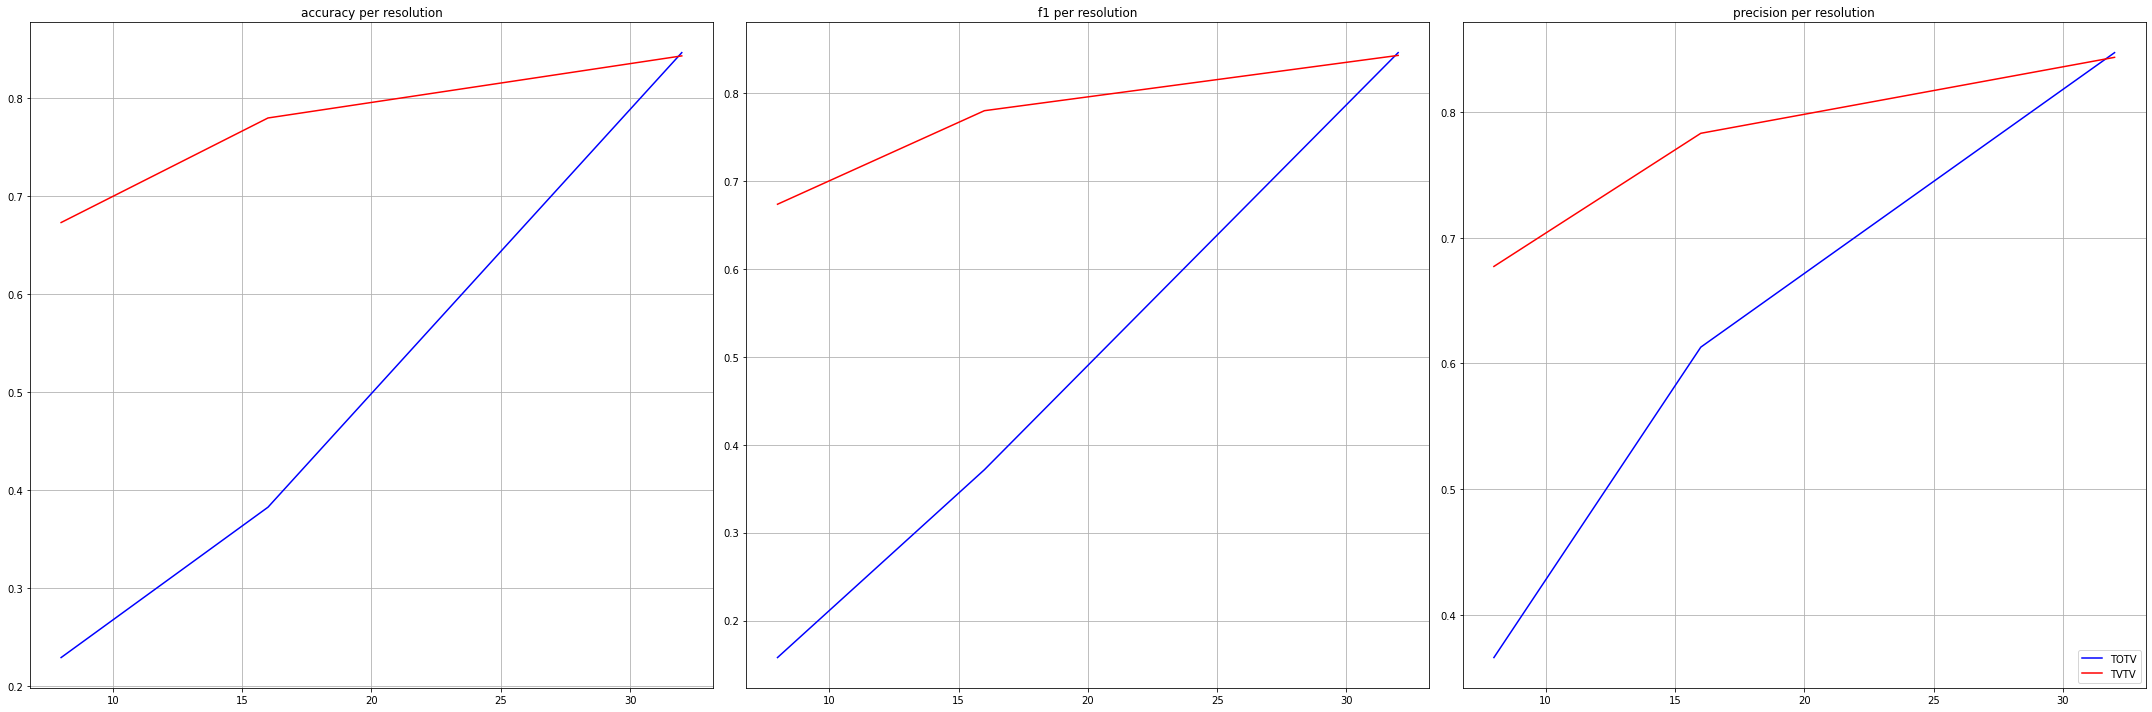

In [75]:
resolution = np.array([32,16,8])

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (30,10))
ax1.plot(resolution,accuracy,'b')
ax1.plot(resolution,accuracy2,'r')
ax1.set_title('accuracy per resolution')
ax1.grid()
ax2.plot(resolution,f1,'b')
ax2.plot(resolution,f12,'r')
ax2.set_title('f1 per resolution')
ax2.grid()
ax3.plot(resolution,precision,'b')
ax3.plot(resolution,precision2,'r')
ax3.set_title('precision per resolution')
ax3.grid()
plt.legend(['TOTV', 'TVTV'], loc='lower right')
fig.tight_layout()